In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Data
df_cleaned = pd.read_csv(r'tweets-data\cleaned.csv')

#slicing
df_cleaned = df_cleaned.iloc[1500:,:]
df_cleaned

,created_at,full_text,location,mentions,tokens,stemmed_tokens,clean_text
1500,Tue Sep 17 07:49:29 +0000 2024,jadi ani ani oknum aparat atau pejabat,Ⓘⓝⓓⓞⓝⓔⓢⓘⓐ,['@gilbhas'],"['ani', 'ani', 'oknum', 'aparat', 'pejabat']","['ani', 'ani', 'oknum', 'aparat', 'jabat']",ani ani oknum aparat jabat
1501,Tue Sep 17 07:49:14 +0000 2024,Hahahhaha di kiranya rakyat pada goblok kali o...,NaN,['@islah_bahrawi'],"['Hahahhaha', 'rakyat', 'goblok', 'kali', 'ota...","['hahahhaha', 'rakyat', 'goblok', 'kali', 'ota...",hahahhaha rakyat goblok kali otak kaya fufufafa
1502,Tue Sep 17 07:49:00 +0000 2024,Kalau hukum itu ada gratifikasi bisa bikin Bap...,Little castle,[],"['hukum', 'gratifikasi', 'bikin', 'Bapaknya', ...","['hukum', 'gratifikasi', 'bikin', 'bapak', 'fu...",hukum gratifikasi bikin bapak fufufafa bungkus...
1503,Tue Sep 17 07:48:58 +0000 2024,emg urgensi nya apa ngusut fufufafa knp nggk n...,Nusantara,['@neVerAl0nely'],"['emg', 'urgensi', 'nya', 'ngusut', 'fufufafa'...","['emg', 'urgensi', 'nya', 'ngusut', 'fufufafa'...",emg urgensi nya ngusut fufufafa knp nggk nguru...
1504,Tue Sep 17 07:48:54 +0000 2024,Stlh disumpah ada tanggungjawab besar dipundak...,NaN,"['@bengkeldodo', '@prabowo']","['Stlh', 'disumpah', 'tanggungjawab', 'dipunda...","['stlh', 'sumpah', 'tanggungjawab', 'pundak', ...",stlh sumpah tanggungjawab pundak kpd rakyatamp...
...,...,...,...,...,...,...,...
1998,Tue Sep 17 04:35:55 +0000 2024,stop calling me fufufafa pleaseeeee,NaN,[],"['stop', 'calling', 'me', 'fufufafa', 'pleasee...","['stop', 'calling', 'me', 'fufufafa', 'pleasee...",stop calling me fufufafa pleaseeeee
1999,Tue Sep 17 04:35:20 +0000 2024,Nah ini tepat penamaan Prof Fufufafa utk,"Banten, Indonesia","['@msaid_didu', '@JimlyAs']","['penamaan', 'Prof', 'Fufufafa', 'utk']","['nama', 'prof', 'fufufafa', 'utk']",nama prof fufufafa utk
2000,Tue Sep 17 04:35:09 +0000 2024,Kirim Mulyono dan Fufufafa ke negara hoax sire...,NaN,['@CutSarina5'],"['Kirim', 'Mulyono', 'Fufufafa', 'negara', 'ho...","['kirim', 'mulyono', 'fufufafa', 'negara', 'ho...",kirim mulyono fufufafa negara hoax sirewel aj ...
2001,Tue Sep 17 04:34:48 +0000 2024,Fufufafa kenapa mukanya gitu sih,NaN,['@Rexthatch'],"['Fufufafa', 'mukanya', 'gitu', 'sih']","['fufufafa', 'muka', 'gitu', 'sih']",fufufafa muka gitu sih


In [14]:
# Mengganti NaN dengan string kosong (jika ada)
df_cleaned['clean_text'] = df_cleaned['clean_text'].fillna("")

In [15]:
# Menggunakan stopwords bahasa Indonesia dari `scikit-learn`
stopwords_id = ["yang", "dan", "di", "ke", "dari", "pada", "untuk", "dengan", "seperti", "adalah", "juga", "ini", "itu", "itu", "pada", "saat"]

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stopwords_id)

# Transformasi teks menjadi matriks TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['clean_text'])


In [7]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4341 stored elements and shape (503, 737)>

In [16]:
# Inisialisasi model NMF dengan 10 topik (dapat disesuaikan)
nmf_model = NMF(n_components=10, random_state=42)

# Latih model NMF dan transformasi teks
nmf_topics = nmf_model.fit_transform(X_tfidf)
# Mendapatkan daftar kata dari TfidfVectorizer
words = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = []
# Menampilkan 10 kata penting dari masing-masing topik
for idx, topic in enumerate(nmf_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    top_words_per_topic.append(top_words)
    print(f"Topik #{idx+1}:")
    print(" ".join(top_words))


Topik #1:
ayo bgt indonesia main kalo otak ganyang prof si fufufafa
Topik #2:
djojohadikusumo subianto gibran prabowo adu gagal solid dombaisu total upaya
Topik #3:
modus mempan kaskus jalur mas retakin prabowogibran fitnah kerja fokus
Topik #4:
otak gibran bukti sih nya tdk gue pimpin aja yg
Topik #5:
rakabuming raka fufufafa hina netizen prabowo duga milik gibran akun
Topik #6:
ganyang hrs kader kalo berani dukung anies nyerang serang pks
Topik #7:
gk habis sabar bgt muka jelek orang aja lu ya
Topik #8:
jabat indonesia katain wowo konstitusi abah dukung haram mulyono anak
Topik #9:
berani suruh tuh wkwkwk negara ganyang suka baca si ga
Topik #10:
kaesang gibran nahan anindya fufufafa bakrie viralvideo libur puncak labubu


In [19]:
# Step 4: Evaluasi dengan Coherence Score
# Membuat representasi teks dalam bentuk list of list kata
texts = [text.split() for text in df_cleaned['clean_text']]

# Membuat dictionary untuk menghitung coherence score
dictionary = gensim.corpora.Dictionary(texts)

# Menghitung coherence score untuk setiap topik
coherence_model = CoherenceModel(topics=top_words_per_topic, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Step 5: Evaluasi dengan Reconstruction Error
reconstruction_error = nmf_model.reconstruction_err_

In [20]:
# Step 6: Menampilkan hasil evaluasi
print(f"\nCoherence Score untuk NMF: {coherence_score}")
print(f"Reconstruction Error untuk NMF: {reconstruction_error}")


Coherence Score untuk NMF: 0.5979089604918432
Reconstruction Error untuk NMF: 20.05766264268246


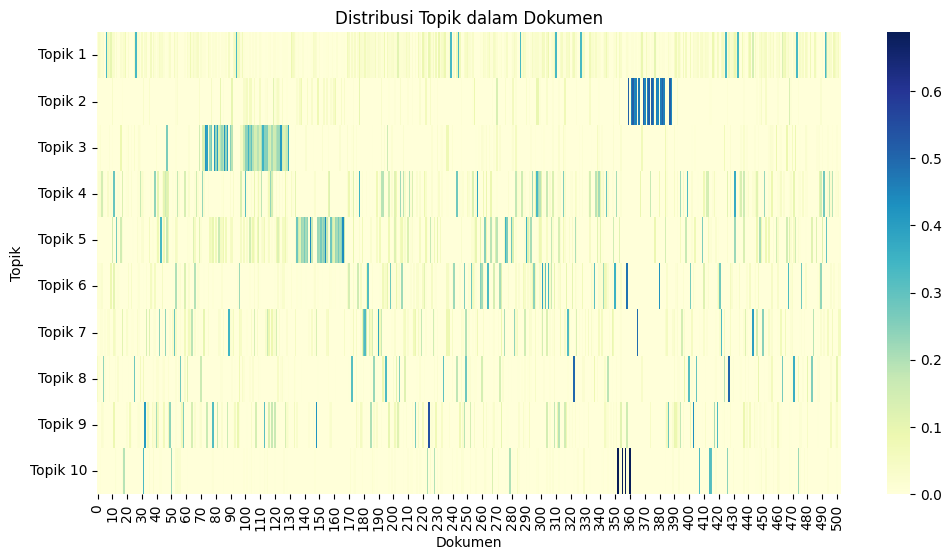

In [21]:
# Step 7: Visualisasi Distribusi Topik dalam Dokumen
topic_distribution = pd.DataFrame(nmf_topics, columns=[f"Topik {i+1}" for i in range(nmf_model.n_components)])
plt.figure(figsize=(12, 6))
sns.heatmap(topic_distribution.T, cmap="YlGnBu", cbar=True)
plt.title("Distribusi Topik dalam Dokumen")
plt.xlabel("Dokumen")
plt.ylabel("Topik")
plt.show()